Jack Duggan C16350866

- currencys was changed to euro
- distances was changed to miles
- colum names were changed/matched
- german and american was translated to english
- post code was converted int lat, long and county using 3rd dataset
    - the 3rd dataset had duplicat values removed as german post codes are interesting
- country colum was added
- ger condition is a binary value so the american contidion was brought into line
- str, summary, unique and various graphs were used to explore the data

# Cleaning and merging the data:

In [1]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
usa = read.csv("data/us500.csv")
ger = read.csv("data/germ500.csv")

In [3]:
nrow(usa)
nrow(ger)

[1] 500

[1] 500

In [4]:
ger <- subset(ger, select=-c(name, seller, dateCreated, nrOfPictures, lastSeen, dateCrawled, offerType))

In [5]:
str(ger)

'data.frame':	500 obs. of  13 variables:
 $ price              : int  480 18300 9800 1500 3600 650 2200 0 14500 999 ...
 $ abtest             : Factor w/ 2 levels "control","test": 2 2 2 2 2 2 2 2 1 2 ...
 $ vehicleType        : Factor w/ 9 levels "","andere","bus",..: 1 5 9 6 6 8 4 8 3 6 ...
 $ yearOfRegistration : int  1993 2011 2004 2001 2008 1995 2004 1980 2014 1998 ...
 $ gearbox            : Factor w/ 3 levels "","automatik",..: 3 3 2 3 3 3 3 3 3 3 ...
 $ powerPS            : int  0 190 163 75 69 102 109 50 125 101 ...
 $ model              : Factor w/ 113 levels "","100","147",..: 55 1 56 55 47 8 6 24 31 55 ...
 $ kilometer          : int  150000 125000 125000 150000 90000 150000 150000 40000 30000 150000 ...
 $ monthOfRegistration: int  0 5 8 6 7 10 8 7 8 0 ...
 $ fuelType           : Factor w/ 5 levels "","andere","benzin",..: 3 4 4 3 4 3 3 3 3 1 ...
 $ brand              : Factor w/ 32 levels "alfa_romeo","audi",..: 31 2 12 31 25 3 21 31 9 31 ...
 $ notRepairedDamage  : Facto

Change geramn words to english words:

In [6]:
ger$fuelType <- as.character(ger$fuelType)
ger$fuelType[ger$fuelType == "andere"] <- "other"
ger$fuelType[ger$fuelType == "benzin"] <- "petrol"
ger$fuelType <- as.factor(ger$fuelType)

In [7]:
ger$gearbox <- as.character(ger$gearbox)
ger$gearbox[ger$gearbox == "manuell"] <- "manual"
ger$gearbox[ger$gearbox == "automatik"] <- "automatic"
ger$gearbox <- as.factor(ger$gearbox)

In [8]:
ger$notRepairedDamage <- as.character(ger$notRepairedDamage)
ger$notRepairedDamage[ger$notRepairedDamage == "ja"] <- "bad"
ger$notRepairedDamage[ger$notRepairedDamage == "nein"] <- "good"
ger$notRepairedDamage <- as.factor(ger$notRepairedDamage)

In [9]:
ger$vehicleType <- as.character(ger$vehicleType)
ger$vehicleType[ger$vehicleType == "andere"] <- "other"
ger$vehicleType[ger$vehicleType == "kombi"] <- "sedan"
ger$vehicleType[ger$vehicleType == "cabrio"] <- "convertible"
ger$vehicleType[ger$vehicleType == "kleinwagen"] <- "wagon"
ger$vehicleType <- as.factor(ger$vehicleType)

Set NA values and convert kilometer to miles

In [10]:
ger[ger==""]<-NA
ger$kilometer = ger$kilometer * 0.621371

In [11]:
colnames(ger)[colnames(ger)=='kilometer'] <- 'odometer'
colnames(ger)[colnames(ger)=='yearOfRegistration'] <- 'year'
colnames(ger)[colnames(ger)=='notRepairedDamage'] <- 'title_status'
colnames(ger)[colnames(ger)=='fuelType'] <- 'fuel'
colnames(ger)[colnames(ger)=='vehicleType'] <- 'type'
colnames(ger)[colnames(ger)=='brand'] <- 'manufacturer'
colnames(ger)[colnames(ger)=='gearbox'] <- 'transmission'
colnames(ger)[colnames(ger)=='title_status'] <- 'condition'

Drop not needed colums 

In [12]:
ger <- subset(ger, select=-c(abtest, powerPS, monthOfRegistration))

In [13]:
pcodes = ger$postalCode
codes = data.frame(pcodes)
nrow(codes)

ZipCodeSourceFile = "http://download.geonames.org/export/zip/DE.zip"
temp <- tempfile()
download.file(ZipCodeSourceFile , temp)
ZipCodes <- read.table(unz(temp, "DE.txt"), sep="\t")
unlink(temp)
names(ZipCodes) = c("CountryCode", "pcodes", "PlaceName", 
"AdminName1", "AdminCode1", "AdminName2", "AdminCode2", 
"AdminName3", "AdminCode3", "latitude", "longitude", "accuracy")

ZipCodes = distinct(ZipCodes,pcodes, .keep_all= TRUE)
fZC_Info = merge(codes, ZipCodes, by = "pcodes", sort = F, all.x = T)

colnames(fZC_Info)[colnames(fZC_Info)=='pcodes'] <- 'postalCode'
fZC_Info <- subset(fZC_Info, select=c("postalCode","AdminName1","latitude","longitude"))

colnames(fZC_Info)[colnames(fZC_Info)=='AdminName1'] <- 'state'
colnames(fZC_Info)[colnames(fZC_Info)=='latitude'] <- 'lat'
colnames(fZC_Info)[colnames(fZC_Info)=='longitude'] <- 'long'

str(fZC_Info)

[1] 500

'data.frame':	500 obs. of  4 variables:
 $ postalCode: int  70435 66954 90480 91074 60437 33775 33775 67112 19348 94505 ...
 $ state     : Factor w/ 17 levels "","Baden-Württemberg",..: 2 12 3 3 8 11 11 12 5 3 ...
 $ lat       : num  48.8 49.2 49.4 49.6 50.2 ...
 $ long      : num  9.18 7.59 11.12 10.89 8.68 ...


Merge postal code df with german df

In [14]:
ger <- merge(ger, fZC_Info, by=c("postalCode"))
ger <- subset(ger, select=-c(postalCode))
ger <- unique(ger)


In [15]:
ger["country"]="DE"

In [16]:
usa <- subset(usa, select=-c(cylinders, vin, size, region, title_status, paint_color, county, drive))

In [17]:
usa["country"]="US"

In [18]:
 usa[usa==""]<-NA
 usa[usa=="NA"]<-NA

In [19]:
#euro is worth 0.92 vs dollar
usa$price = usa$price * 0.92

In [20]:
usa$fuel <- as.character(usa$fuel)
usa$fuel[usa$fuel == "gas"] <- "petrol"
usa$fuel <- as.factor(usa$fuel)

merge german and usa datasets

In [21]:
bigboi <- rbind(ger, usa)

The german condition is a binary value where as the usa value is multiple values these values are now brought into line with the german datatset

In [22]:
bigboi$condition <- as.character(bigboi$condition)
bigboi$condition[bigboi$condition == "new"] <- "good"
bigboi$condition[bigboi$condition == "excellent"] <- "good"
bigboi$condition[bigboi$condition == "fair"] <- "bad"
bigboi$condition[bigboi$condition == "like new"] <- "good"
bigboi$condition[bigboi$condition == "salvage"] <- "bad"

bigboi$condition <- as.factor(bigboi$condition)

In [23]:
#Remove outlier value
bigboi = subset(bigboi, price<= 10000000)

In [24]:
write.csv(bigboi,"data/merged.csv", row.names = FALSE)

# Exploring the data:

In [25]:
str(bigboi)

'data.frame':	999 obs. of  13 variables:
 $ price       : num  2238 12000 14999 2790 6999 ...
 $ type        : Factor w/ 16 levels "","bus","convertible",..: 9 8 3 5 9 6 7 9 6 7 ...
 $ year        : num  2003 2011 2007 1992 2009 ...
 $ transmission: Factor w/ 4 levels "","automatic",..: 3 3 3 3 3 3 3 3 3 2 ...
 $ model       : Factor w/ 439 levels "","100","147",..: 41 99 8 14 58 24 55 83 64 55 ...
 $ odometer    : num  77671 93206 31069 49710 18641 ...
 $ fuel        : Factor w/ 7 levels "","diesel","lpg",..: 5 2 5 5 5 2 2 5 NA 5 ...
 $ manufacturer: Factor w/ 51 levels "alfa_romeo","audi",..: 20 31 3 2 24 21 31 31 20 31 ...
 $ condition   : Factor w/ 2 levels "bad","good": 2 2 2 2 2 1 2 2 NA 2 ...
 $ state       : Factor w/ 27 levels "","Baden-Württemberg",..: 14 14 14 14 14 14 14 5 14 14 ...
 $ lat         : num  51.1 51 51.1 51 50.9 ...
 $ long        : num  13.7 13.7 13.7 13.8 13.7 ...
 $ country     : chr  "DE" "DE" "DE" "DE" ...


In [26]:
summary(bigboi)

     price              type          year         transmission     model    
 Min.   :    0   sedan    :184   Min.   :1910            :  0   golf   : 49  
 1st Qu.: 1694   limousine:132   1st Qu.:2002   automatic:539   andere : 38  
 Median : 5055   wagon    :104   Median :2008   manual   :383   3er    : 29  
 Mean   : 7551   SUV      : 83   Mean   :2007   other    : 36   5er    : 17  
 3rd Qu.:11011   coupe    : 65   3rd Qu.:2013   NA's     : 41   astra  : 17  
 Max.   :90500   (Other)  :212   Max.   :2019                   (Other):819  
                 NA's     :219                                  NA's   : 30  
    odometer           fuel         manufacturer condition 
 Min.   :     0   petrol :756   volkswagen:125   bad : 58  
 1st Qu.: 59934   diesel :171   ford      : 99   good:635  
 Median : 93206   other  :  8   chevrolet : 78   NA's:306  
 Mean   : 89510   lpg    :  6   bmw       : 73             
 3rd Qu.: 93206   hybrid :  3   audi      : 57             
 Max.   :594000 

Warning message in plot.window(xlim, ylim, log = log, ...):
“graphical parameter "type" is obsolete”
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
“graphical parameter "type" is obsolete”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“graphical parameter "type" is obsolete”
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
“graphical parameter "type" is obsolete”


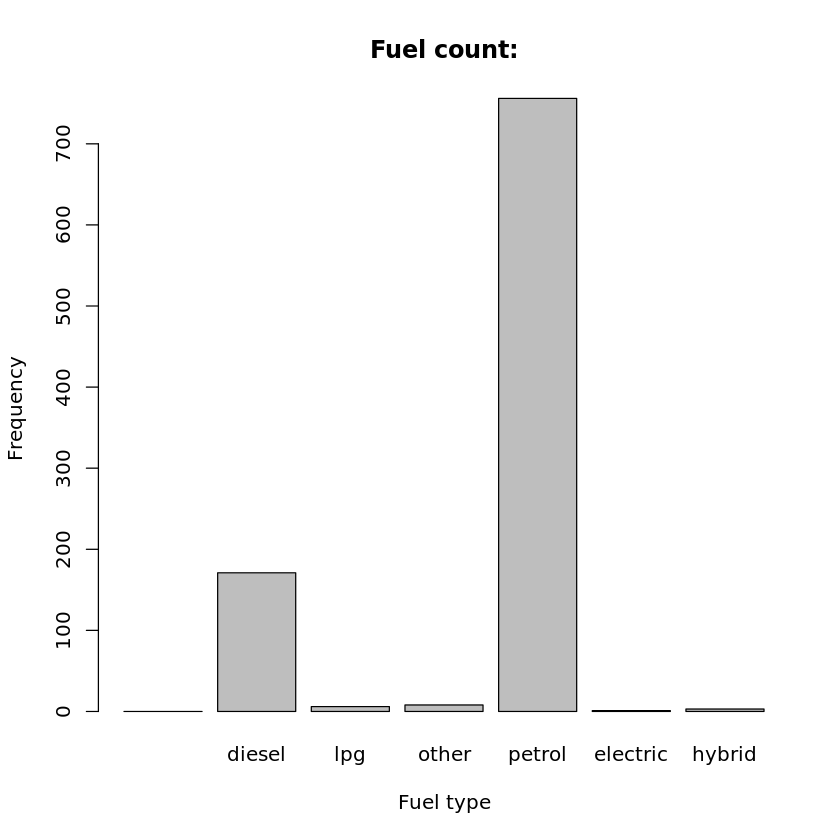

In [27]:
plot(bigboi$fuel, type="h", main = 'Fuel count:', xlab="Fuel type", ylab="Frequency")

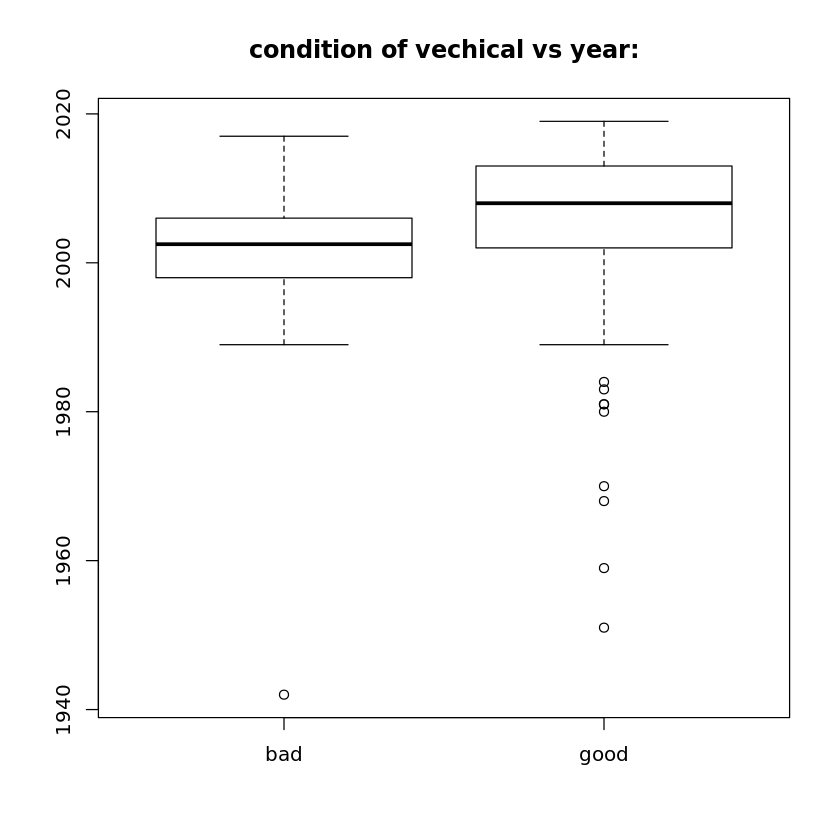

In [28]:
plot(bigboi$condition, bigboi$year, main = "condition of vechical vs year:")

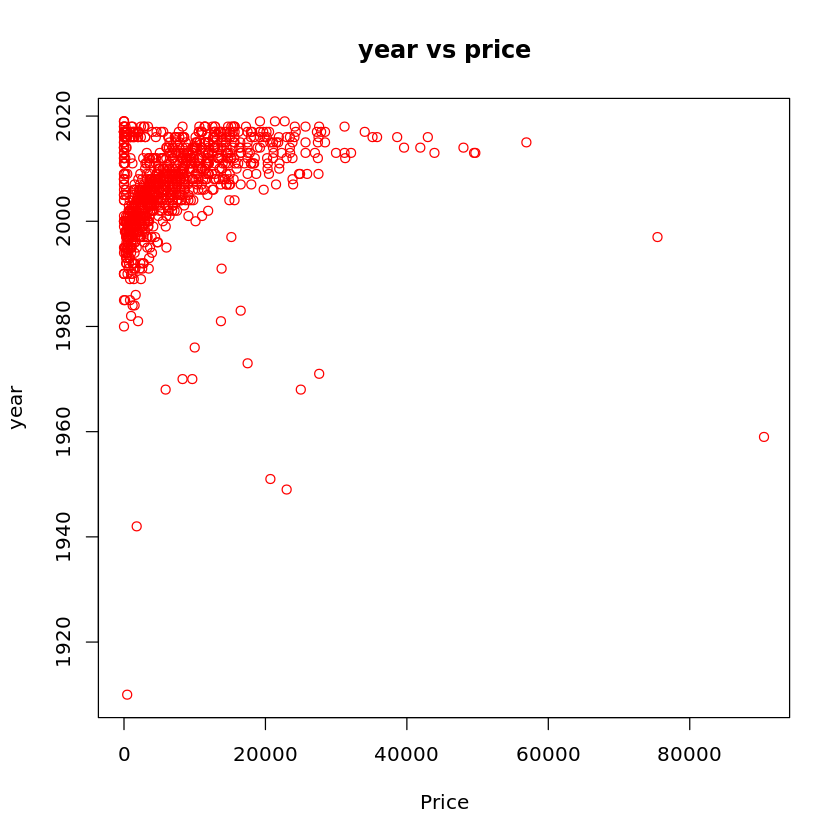

In [29]:
plot(bigboi$price, bigboi$year ,col = 'red',main = 'year vs price', xlab="Price", ylab="year")

In [30]:
#install.packages("lattice")
library(lattice)

In [31]:
options(scipen=999999)
#fixed notation when bellow scipen value

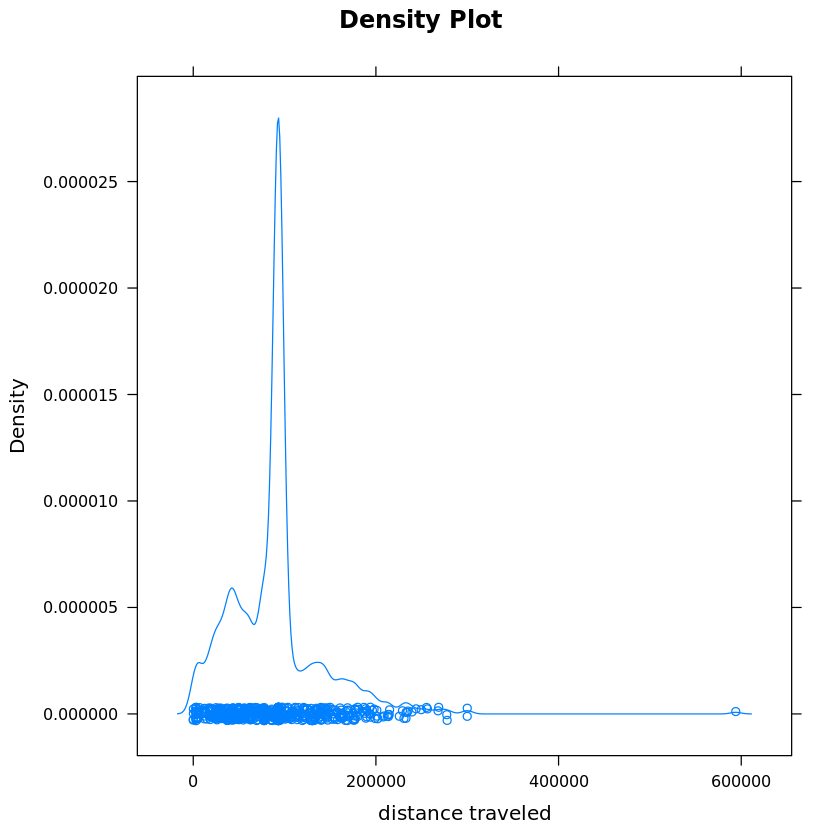

In [32]:
densityplot(bigboi$odometer, main="Density Plot",  xlab="distance traveled")

In [33]:
#install.packages("ggplot2")
library(ggplot2)

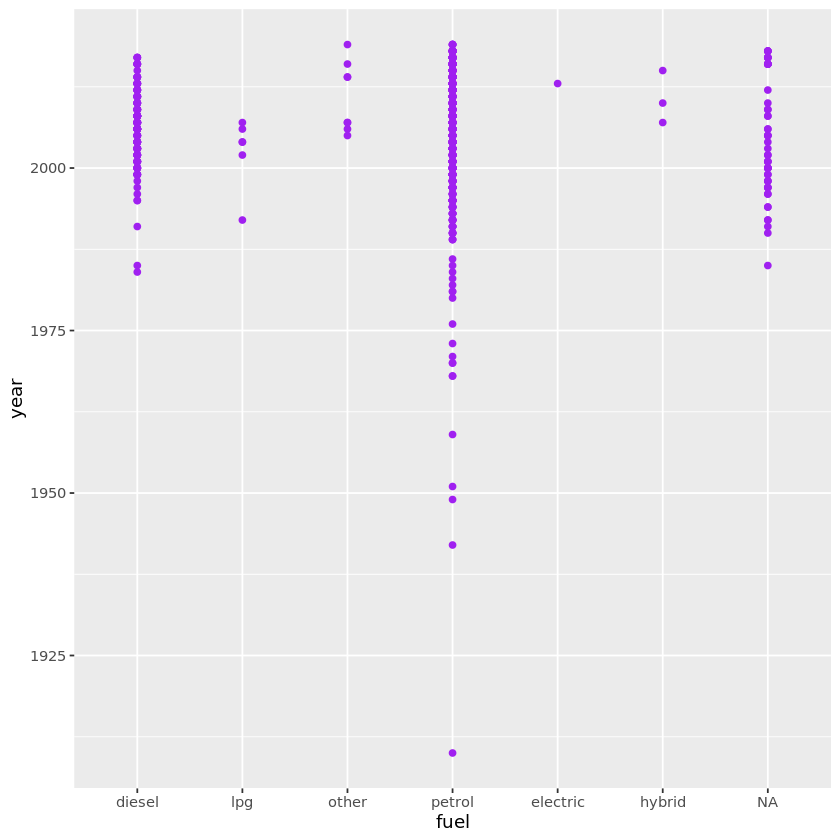

In [34]:
ggplot(data=bigboi, mapping=aes(x=fuel, y=year)) + geom_point(colour = "purple")

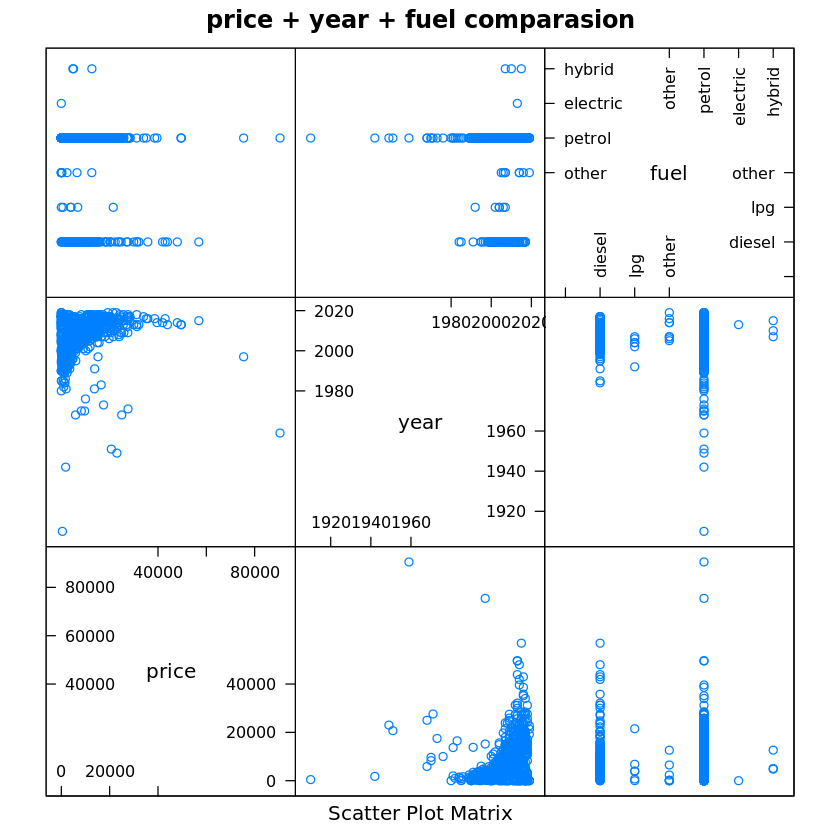

In [35]:
splom(bigboi[c(1, 3, 7)], main="price + year + fuel comparasion")

In [36]:
bigboide = subset(bigboi, country=="DE")
bigboius = subset(bigboi, country=="US")

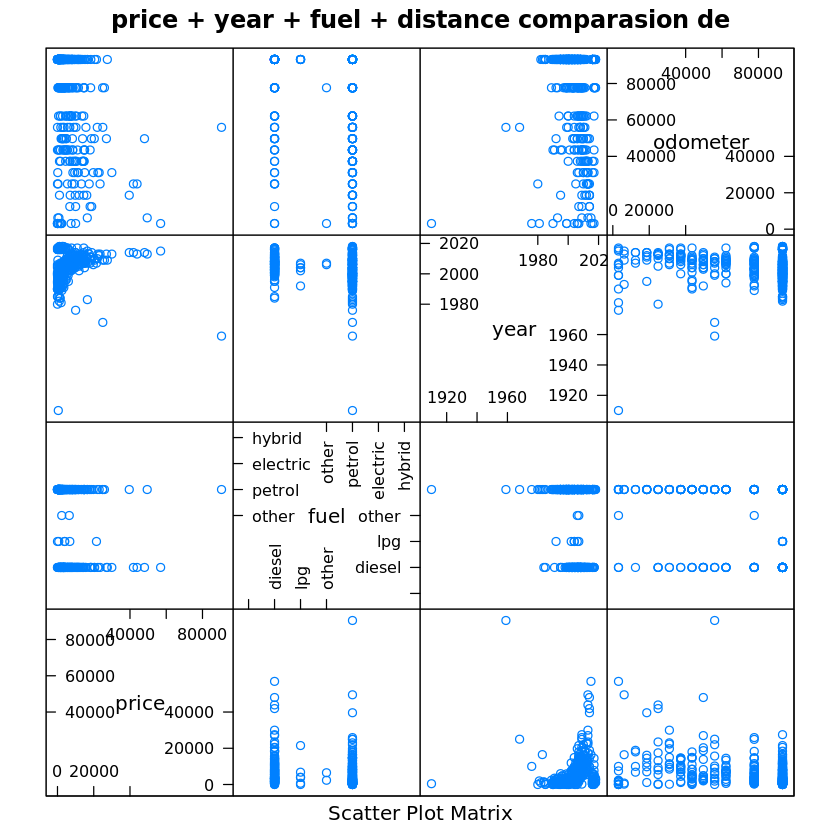

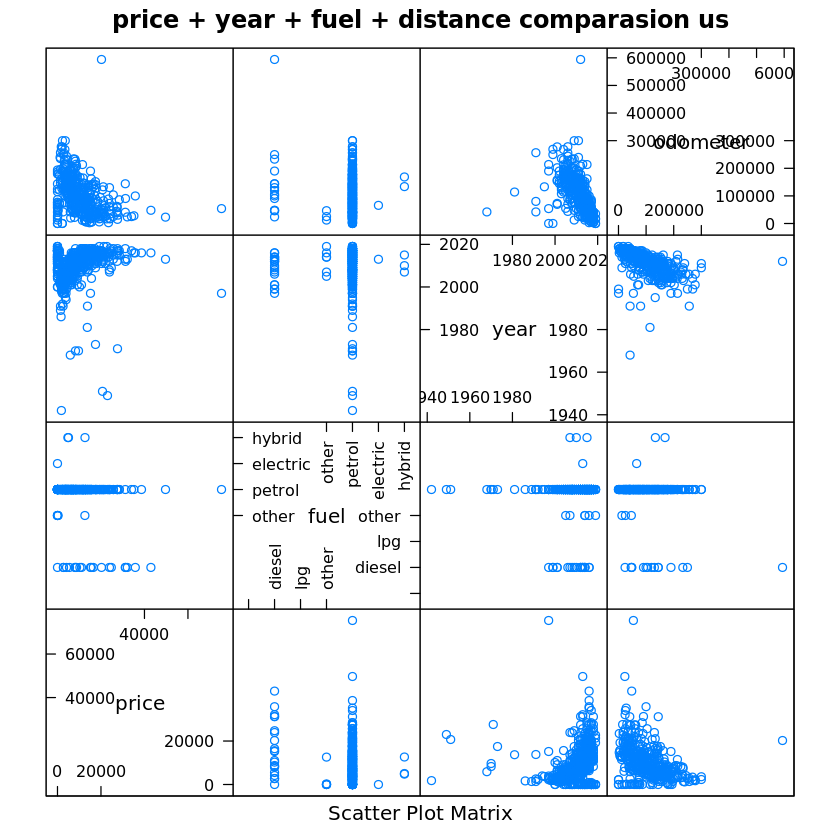

In [37]:
splom(bigboide[c(1, 7, 3, 6)], main="price + year + fuel + distance comparasion de")
splom(bigboius[c(1, 7, 3, 6)], main="price + year + fuel + distance comparasion us")

Note: splom is cool

# stuff used when exploring

In [38]:
str(usa)
print("-----------")
str(ger)

'data.frame':	500 obs. of  13 variables:
 $ price       : num  9475 0 8740 3675 38629 ...
 $ year        : num  2012 2011 2011 2004 2016 ...
 $ manufacturer: Factor w/ 35 levels "","acura","audi",..: 2 4 17 14 7 19 7 4 33 33 ...
 $ model       : Factor w/ 344 levels "","🔴100% APPROVAL RATE🔴",..: 313 15 336 114 282 295 315 22 286 300 ...
 $ condition   : Factor w/ 7 levels "","excellent",..: NA NA 2 NA NA NA NA NA NA NA ...
 $ fuel        : Factor w/ 5 levels "diesel","electric",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ odometer    : num  90186 115120 85000 212526 NA ...
 $ transmission: Factor w/ 4 levels "","automatic",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ type        : Factor w/ 13 levels "","convertible",..: 7 2 NA 10 NA 13 10 9 2 7 ...
 $ state       : Factor w/ 10 levels "co","ia","il",..: 5 5 5 5 6 5 5 5 5 5 ...
 $ lat         : num  35.8 NA 36.1 35.8 41.1 ...
 $ long        : num  -78.7 NA -79.9 -78.7 -96.2 ...
 $ country     : chr  "US" "US" "US" "US" ...
[1] "-----------"
'data.frame':	500 obs.

In [39]:
for(i in colnames(ger)) {
    print(i)
    print(unique(ger[[i]]))
    print("--------------------------------")
}

[1] "price"
  [1]  2238 12000 14999  2790  6999  4760  1800  4490  1600 13499 17999 11500
 [13]  1300  4900  1400 11919  1200  7000  2800   200 16150   350  5500  2500
 [25]   800   250   500  5900  2600   450  9790 39600 11900  1999  3000  4650
 [37]  1500  1700  6900  1490   650  2899  1299  2000 14499  1990 14900  9600
 [49]  1000  1099  1499  8500  2222  3999  1480     0   850  3900  4300  1450
 [61]  8450  8700  3650   130 11299  3750  4000  4800  4290   750  2990  1350
 [73]   600  3400   300 10800  2100 11000  3200 12999  6450  2350  5000  7950
 [85]  8999  1699 11550  2550   999  2390   950  7600  1199  3300  8390 10500
 [97] 24900  3850   370  5555  5800 14500  9500   590   150 15700 21500  1750
[109]  2399   900  7500  2700  7700 13500  8250  9290  6000   899 19750  8100
[121] 18000  2400  2300     1  3250   890  4500  2950  6600  6799  5600 14700
[133]  4850 16500  2499  1950   245 10550  2750  1100  1150  6990  1690 15500
[145] 56900  6350  3390  2999  4450   400 12500  799

In [40]:
for(i in colnames(usa)) {
    print(i)
    print(unique(usa[[i]]))
    print("--------------------------------")
}

[1] "price"
  [1]     9475.08        0.00     8740.00     3675.40    38628.96    11955.40
  [7]    10115.40     8275.40     7355.40    11035.40     5055.40     8270.80
 [13]     6900.00     5515.40    17790.04     6348.00    14076.00     9103.40
 [19]     3680.00     4503.40 13782059.08    14720.00    10074.00     8648.00
 [25]    35788.00     1380.00     4140.00      919.08     2070.00     4135.40
 [31]     1375.40        0.92     2576.00     6251.40     7350.80     9098.80
 [37]    23828.00    27278.00     6430.80     6982.80     5980.00     8822.80
 [43]     7268.00     4599.08     7911.08    31280.00     4416.00    25668.00
 [49]    23460.00     3634.00     3220.00    11858.80    20194.00    11214.80
 [55]     7162.20    14439.40     3864.00    19223.40     5519.08     5242.16
 [61]     6440.00     2300.00      920.00     5060.00    75440.00    11040.00
 [67]    13754.00     1794.00    11495.40     7359.08    13708.00    11950.80
 [73]    13790.80    14710.80    10580.00     8464.0

In [41]:
for(i in colnames(bigboi)) {
    print(i)
    print(unique(bigboi[[i]]))
    print("--------------------------------")
}

[1] "price"
  [1]  2238.00 12000.00 14999.00  2790.00  6999.00  4760.00  1800.00  4490.00
  [9]  1600.00 13499.00 17999.00 11500.00  1300.00  4900.00  1400.00 11919.00
 [17]  1200.00  7000.00  2800.00   200.00 16150.00   350.00  5500.00  2500.00
 [25]   800.00   250.00   500.00  5900.00  2600.00   450.00  9790.00 39600.00
 [33] 11900.00  1999.00  3000.00  4650.00  1500.00  1700.00  6900.00  1490.00
 [41]   650.00  2899.00  1299.00  2000.00 14499.00  1990.00 14900.00  9600.00
 [49]  1000.00  1099.00  1499.00  8500.00  2222.00  3999.00  1480.00     0.00
 [57]   850.00  3900.00  4300.00  1450.00  8450.00  8700.00  3650.00   130.00
 [65] 11299.00  3750.00  4000.00  4800.00  4290.00   750.00  2990.00  1350.00
 [73]   600.00  3400.00   300.00 10800.00  2100.00 11000.00  3200.00 12999.00
 [81]  6450.00  2350.00  5000.00  7950.00  8999.00  1699.00 11550.00  2550.00
 [89]   999.00  2390.00   950.00  7600.00  1199.00  3300.00  8390.00 10500.00
 [97] 24900.00  3850.00   370.00  5555.00  5800.00 1